In [23]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../distvis")
from plots import *
import plotly.io as pio

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We can use the following lines of codes and set **interactive_plots=False** to make static plots that can be showed on Github

In [24]:
interactive_plots = False
if interactive_plots is False:
    pio.renderers.default = "svg"

# Histograms

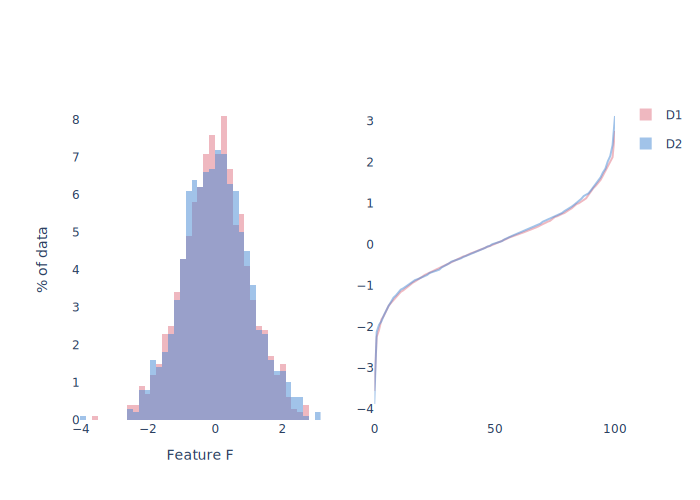

             distance
data1 data2          
D1    D2     0.005253


In [25]:
np.random.seed(1234)

f0 = np.random.randn(1000)
f1 = np.random.randn(1000)

data_dict = {
    'D1': f0,
    'D2': f1,
}

fig = plot_histograms(data_dict, xaxis_title='Feature F', yaxis_title='% of data', nbins=40, 
                      plot_hist=True, plot_cdf=False, plot_inv_cdf=True)
fig.show()
print(calc_wasserstein(data_dict, normalize=True))

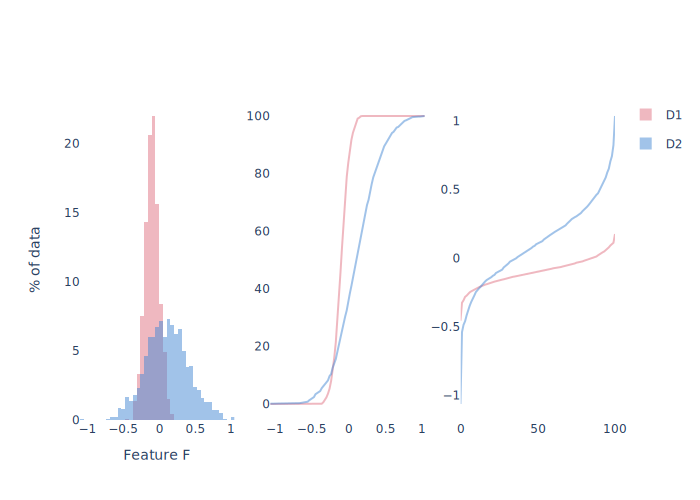

             distance
data1 data2          
D1    D2      0.11306


In [26]:
np.random.seed(1234)

f0 = np.random.normal(loc=-.1, scale=0.1, size=1000)
f1 = np.random.normal(loc=.1, scale=0.3, size=1000)

data_dict = {
    'D1': f0,
    'D2': f1,
}

fig = plot_histograms(data_dict, xaxis_title='Feature F', yaxis_title='% of data', nbins=40,
                     plot_hist=True, plot_cdf=True, plot_inv_cdf=True)
fig.show()
print(calc_wasserstein(data_dict, normalize=True))

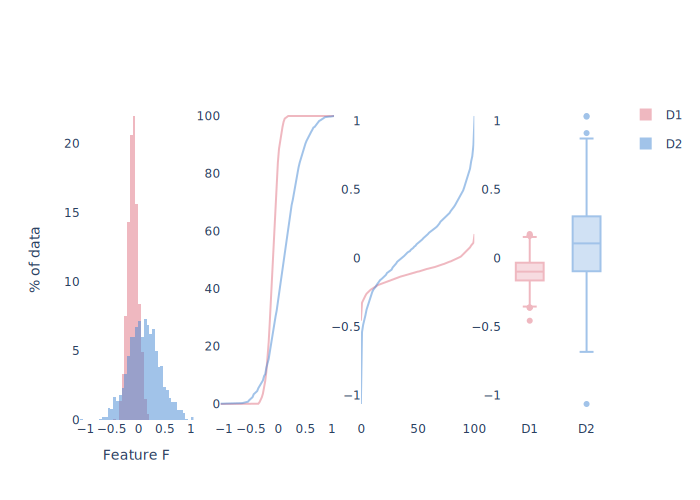

             distance
data1 data2          
D1    D2      0.11306


In [27]:
np.random.seed(1234)

f0 = np.random.normal(loc=-.1, scale=0.1, size=1000)
f1 = np.random.normal(loc=.1, scale=0.3, size=1000)

data_dict = {
    'D1': f0,
    'D2': f1,
}

fig = plot_histograms(data_dict, xaxis_title='Feature F', yaxis_title='% of data', nbins=40,
                     plot_hist=True, plot_cdf=True, plot_inv_cdf=True, plot_box = True)
fig.show()
print(calc_wasserstein(data_dict, normalize=True))

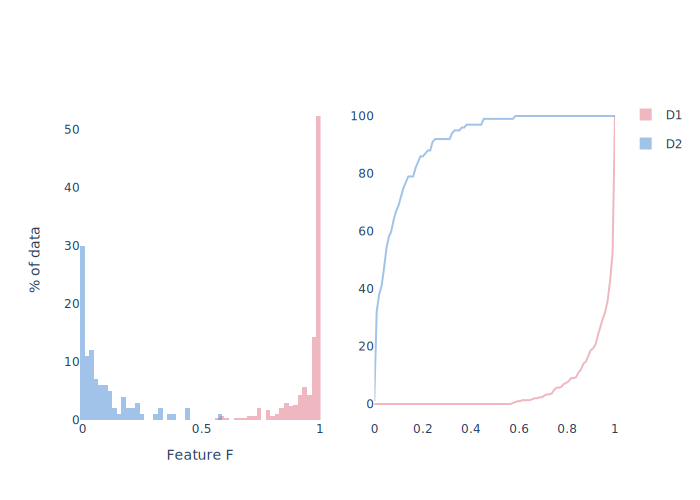

             distance
data1 data2          
D1    D2     0.860262


In [28]:
np.random.seed(1234)

f0 = np.random.beta(a=5, b=0.3, size=300)
f1 = np.random.beta(a=.4, b=4, size=100)

data_dict = {
    'D1': f0,
    'D2': f1,
}

fig = plot_histograms(data_dict, xaxis_title='Feature F', yaxis_title='% of data', nbins=30, plot_cdf=True)
fig.show()
print(calc_wasserstein(data_dict, normalize=True))

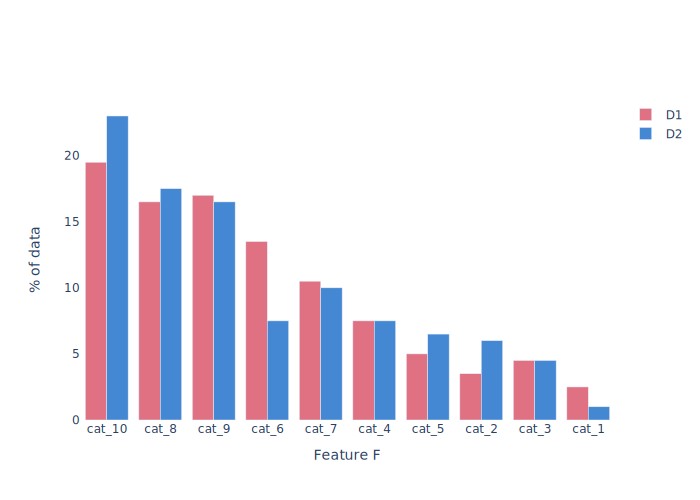

,,distance
data1,data2,
D1,D2,0.17


In [29]:
np.random.seed(1234)

n_categs = 10
samples = 200
categs = [f'cat_{i}' for i in range(1, n_categs+1)]

p0 = np.random.dirichlet(alpha=10000*np.arange(1, n_categs+1))
p1 = np.random.dirichlet(alpha=10000*np.arange(1, n_categs+1))


f0 = np.random.choice(categs, p=p0, size=samples)
f1 = np.random.choice(categs, p=p1, size=samples)

data_dict = {
    'D1': f0,
    'D2': f1,
}

fig = plot_discrete_histogram(data_dict, xaxis_title='Feature F', yaxis_title='% of data')
fig.show()
calc_total_variation(data_dict, normalize=False)

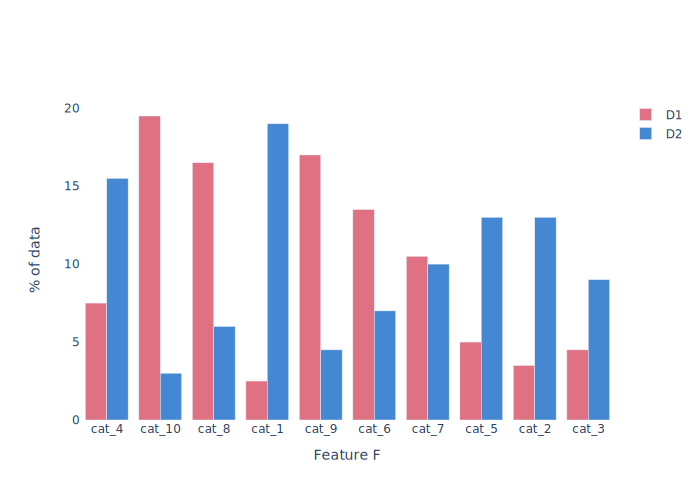

,,distance
data1,data2,
D1,D2,0.93


In [30]:
np.random.seed(1234)

n_categs = 10
samples = 200
categs = [f'cat_{i}' for i in range(1, n_categs+1)]

p0 = np.random.dirichlet(alpha=10000*np.arange(1, n_categs+1))
p1 = np.random.dirichlet(alpha=10000*np.arange(1, n_categs+1)[::-1])


f0 = np.random.choice(categs, p=p0, size=samples)
f1 = np.random.choice(categs, p=p1, size=samples)

data_dict = {
    'D1': f0,
    'D2': f1,
}

fig = plot_discrete_histogram(data_dict, xaxis_title='Feature F', yaxis_title='% of data')
fig.show()
calc_total_variation(data_dict, normalize=False)

# Marginal dependence plots

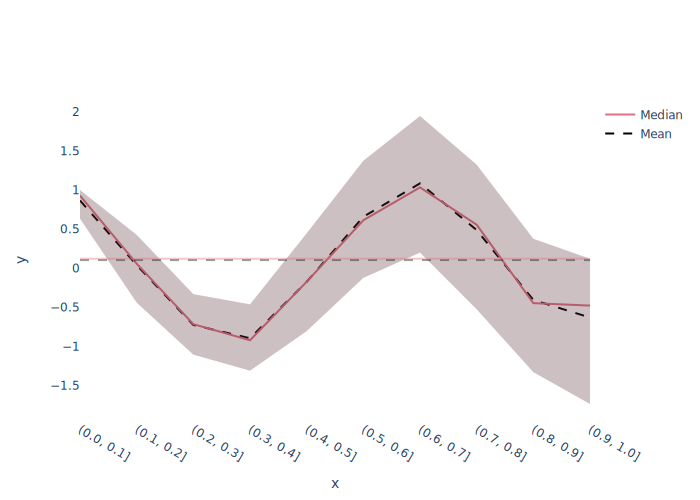

In [31]:
np.random.seed(1234)

x = np.random.beta(0.8, 1.6, 1000)
y = np.cos(10*x) + np.random.normal(0, x)
data = pd.DataFrame({'x': x, 'y': y})
bins = np.linspace(0, 1, 11)

fig = marginal_dependency_plot(data, 'y', 'x', bins=bins)
fig.show()

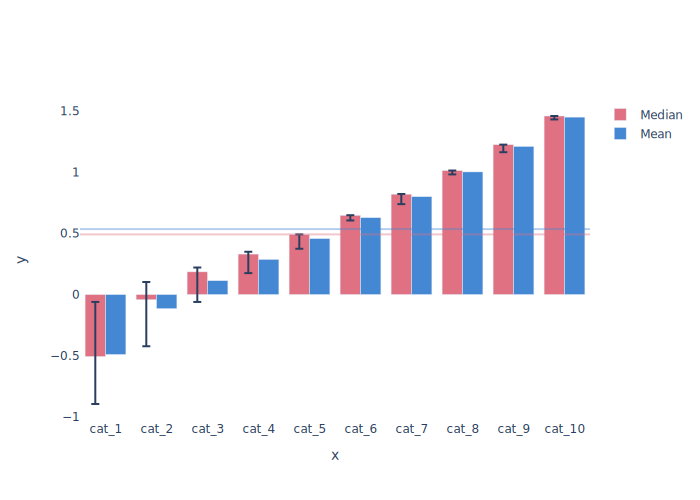

In [32]:
np.random.seed(1234)

n_categs = 10
samples = 200
categs = np.array([f'cat_{i}' for i in range(1, n_categs+1)])
x_index = np.random.randint(n_categs, size=1000)
x = categs[x_index]
y = np.exp(x_index/10) + np.random.beta(a=(x_index+1), b=1/(x_index+1))-2
data = pd.DataFrame({'x': x, 'y': y})
fig = marginal_dependency_plot(data, 'y', 'x', categorical_feature=True)
fig.show()
